<a href="https://colab.research.google.com/github/avinashyadav11/Book-Recommendation/blob/main/Book_Recommendations_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Book Recommendation System

- During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. 
- From e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
- In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
- Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. 
- The main objective is to create a book recommendation system for users.


### Content
The Book-Crossing dataset comprises 3 files.
- #### Users
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.
- #### Books
Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors <b>(Image-URL-S,
Image-URL-M, Image-URL-L)</b>, i.e., small, medium, large. These URLs point to the
Amazon website.
- #### Ratings
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

In [17]:
#Importing the required libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
books= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alma Better/Book Recommendation System/Books.csv', error_bad_lines=False,encoding="latin-1")
b1 = books.copy()

In [20]:
users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alma Better/Book Recommendation System/Users.csv' ,error_bad_lines=False, encoding="latin-1")

In [21]:
ratings =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alma Better/Book Recommendation System/Ratings.csv' ,error_bad_lines=False,encoding="latin-1")

In [22]:
# Let's store images URL in another dataset 
images = books
images = images.drop(['ISBN', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S','Image-URL-L'], axis=1)

In [23]:
# Shape of the books dataset 
books.shape

(271360, 8)

In [24]:
# Shape of ratings dataset
ratings.shape

(1149780, 3)

In [25]:
# Shape of Users dataset
users.shape

(278858, 3)

In [26]:
# Let's see the details of books dataset
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [27]:
# Let's see the details of Users dataset
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [28]:
# Let's see the details of Ratings dataset
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [29]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [30]:
books = books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)

## EDA 

We shall be doing EDA on each dataset one by one <br>

### Rating Dataframe
<br>
Let's check some null values present in the books dataset and we shall try to fill them

In [31]:
# Null values present in author
books.loc[books['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [32]:
# Null values in Publisher
books.loc[books['Publisher'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [33]:
# Imputing null values in Author
books.at[187689, 'Book-Author'] = 'Other'

In [34]:
# Imputing null values in publisher
books.at[128890, 'Publisher'] = 'Other'

In [35]:
# Imputing null values in Publisher
books.at[129037, 'Publisher'] = 'Other'

In [36]:
# Let's check year column
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

We can see that some of the values in year column are abdnormal and they need to be removed like
- DK Publishing Inc 
- Gallimard <br>
These values has to be removed from year column

In [37]:
pd.set_option('display.max_colwidth', -1)

In [38]:
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [39]:
books.loc[books['Year-Of-Publication'] == 'Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?ÃÂ©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [40]:
books.at[209538, 'Year-Of-Publication'] =2000
books.at[209538, 'Publisher'] = 'DK Publishing Inc'
books.at[209538, 'Book-Author'] = 'Michael Teitelbaum'
books.at[209538, 'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'

books.at[221678, 'Year-Of-Publication'] =2000
books.at[221678, 'Publisher'] = 'DK Publishing Inc'
books.at[221678, 'Book-Author'] = 'James Buckley'
books.at[221678, 'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'

books.at[220731, 'Year-Of-Publication'] =2003
books.at[220731, 'Publisher'] = 'Gallimard'
books.at[220731, 'Book-Author'] = 'Jean-Marie Gustave Le Clezio'
books.at[220731, 'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers'

In [41]:
# let's convert entire year column in integer format 
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [42]:
print(sorted(list(books['Year-Of-Publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [43]:
y_df = pd.DataFrame(books['Year-Of-Publication'].value_counts())
y_df = y_df.head(25)

In [44]:
books.at[books['Year-Of-Publication'] > 2022] = 2002

In [45]:
books.at[books['Year-Of-Publication'] == 0] = 2002

In [46]:
print(sorted(list(books['Year-Of-Publication'].unique())))

[1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021]


In [47]:
# Info of the ratings column
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [48]:
# Checking the null values in the dataset 
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [49]:
# Checking the tendency of ratings dataset with describe
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


Text(0.5, 1.0, 'Book Ratings count')

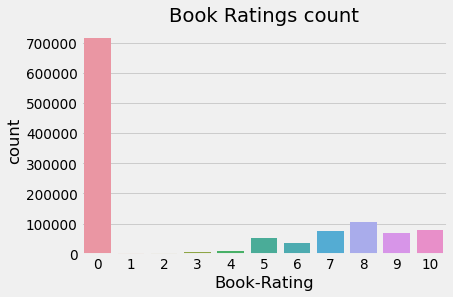

In [50]:
# Checking the distribution of the rating and see the highest number of ratings
plt.style.use('fivethirtyeight')
plt.figure(dpi=70)
sns.countplot(ratings['Book-Rating'])
plt.title('Book Ratings count')

- Here we can see that the rating 0 either shows the users did not read or rated the books.
- It shows that the most of the people either didn't rate or read the books.
- However 8 has been rated second highest after 0.
- So it would be rather better if we drop this 0 rating and do the further analysis on the columns

In [51]:
# Dropping the rating less than 0
ratings_df = ratings[ratings['Book-Rating'] > 0]

Text(0.5, 1.0, 'Book Ratings count')

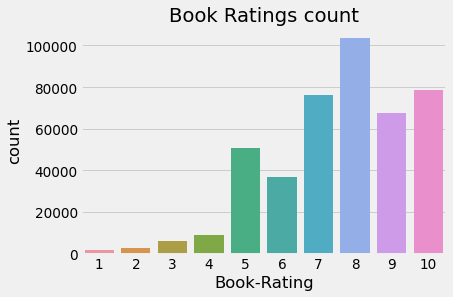

In [52]:
# Plotting the top ratings after removing the 0 rating 
plt.style.use('fivethirtyeight')
plt.figure(dpi=70)
sns.countplot(ratings_df['Book-Rating'])
plt.title('Book Ratings count')

- Now we can see that in the ratings plot most of the books have been rated 8 out of 10 
- The number for 1 rating is lowest among all 
- Second highest ratings have received as 10 and 7 stars
- Let's see these hishest ratings 

In [53]:
# Value counts of the ratings
ratings_df.value_counts().count()

433671

In [54]:
# Finding the highest rated ISBN number of the books and leter we shall plot it 
df = pd.DataFrame(ratings_df.groupby('ISBN')['Book-Rating'].count().sort_values(ascending=False).head(10))
df

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0679781587,333
0060928336,320
059035342X,313
0142001740,307
0446672211,295


Text(0.5, 1.0, 'Top 10 ratings of the books')

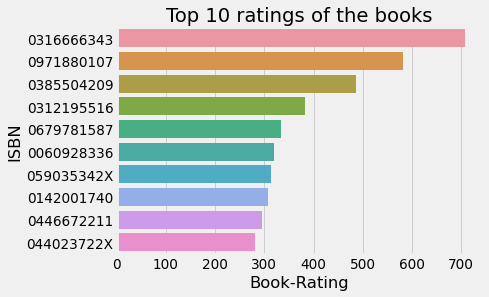

In [55]:
# Plot showing the top 10 most rated books 
plt.figure(dpi=70)
sns.barplot(y=df.index, x=df['Book-Rating'])
# plt.xticks(rotation=90)
plt.title('Top 10 ratings of the books')

- Let's merge the ISBN with the other dataset containing names and see which all these books are 

In [56]:
# Fetching the books name with ISBN number of these top 10 books
df1 = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0679781587', '0060928336',
                    '059035342X', '0142001740', '0446672211','044023722X'], index=np.arange(10), columns=['ISBN'])

In [57]:
# ISBN number with books name 
df1 = pd.merge(df, books, on='ISBN')
df1[['ISBN', 'Book-Rating', 'Book-Title']]

,ISBN,Book-Rating,Book-Title
0,0316666343,707,The Lovely Bones: A Novel
1,0971880107,581,Wild Animus
2,0385504209,487,The Da Vinci Code
3,0312195516,383,The Red Tent (Bestselling Backlist)
4,0060928336,320,Divine Secrets of the Ya-Ya Sisterhood: A Novel
5,059035342X,313,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
6,0142001740,307,The Secret Life of Bees
7,0446672211,295,Where the Heart Is (Oprah's Book Club (Paperback))
8,044023722X,281,A Painted House


Text(0.5, 1.0, 'Top 10 books based on Rating')

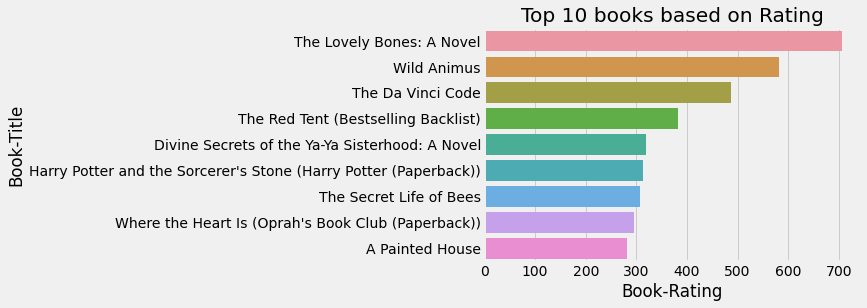

In [58]:
# Following plot shows top 10 books based on the rating
sns.barplot(y=df1['Book-Title'], x=df1['Book-Rating'])
# plt.xticks(rotation=90)
plt.title('Top 10 books based on Rating')

## Users Dataset 

In [59]:
# Checking Users data
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [60]:
# Users data info 
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [61]:
# Checking the tendancy of the users dataset
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [62]:
# Checking the null values by percentage of the users dataset
df = pd.DataFrame(users.isna().sum(), columns=['Null values'])
df['% Null values'] = np.round(100 * (df['Null values']) / len(users['Age']), 2)
df

,Null values,% Null values
User-ID,0,0.00
Location,0,0.00
Age,110762,39.72


- We have 39% missing values in Age column 

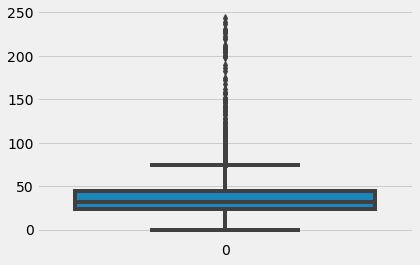

In [63]:
# Boxplot to find outlier 
sns.boxplot(data=users['Age'])

From the above plot we can see that
- The average age is lying around 50 whereas the highest age is 250 years
- Certainly we have so many outliers.
- We shall drop the rows having age more than 100 
- Let's see the skewness through histplot

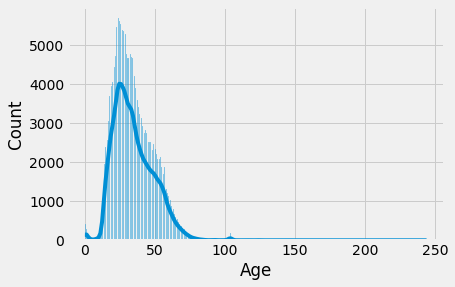

In [64]:
# Histplot shoewing the distribution of the Age column
sns.histplot(users['Age'], kde=True)

- Here we can see that the data is highly skewed to the right from it's tail
- We shall drop the outliers and see the distribution again

In [65]:
# Removing the age more than 100 years 
users_df1 = users[users['Age']<= 100]

In [66]:
# Verifying the age columns as we don't have any value more than 100 now 
users_df1[users_df1['Age'] >100]

,User-ID,Location,Age


In [67]:
# Removing the age less than 5 years 
users_df1 = users_df1[users_df1['Age'] >= 5]

#### Imputing the null values with the median of the age 

In [68]:
#Imputing the NaN values with the median of the user column 
users_df1['Age'] = users['Age'].fillna(users['Age'].median())

In [69]:
# CHecking the null values of the column once again 
df = pd.DataFrame(users_df1.isna().sum(), columns=['Null values'])
df['% Null values'] = np.round(100 * (df['Null values']) / len(users_df1['Age']), 2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, User-ID to Age
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Null values    3 non-null      int64  
 1   % Null values  3 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 72.0+ bytes


Text(0.5, 1.0, 'Highest number of readers with respect to age')

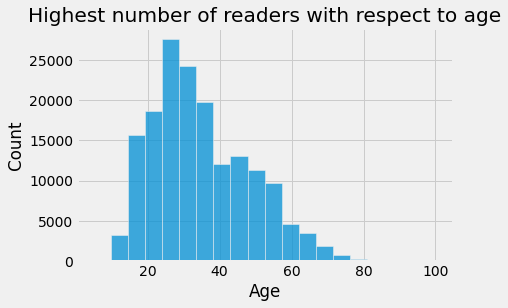

In [70]:
# Highest number of readers age group
sns.histplot(data=users_df1['Age'] , bins=20)
plt.title('Highest number of readers with respect to age')

- Highest number of the readers lies in between the age group of 20 - 40
- People having age of 20-30 are the highest readers exactly.

In [71]:
# Unique locations in various columns 
users_df1.Location.unique()

array(['stockton, california, usa', 'porto, v.n.gaia, portugal',
       'santa monica, california, usa', ...,
       'hanoi, australian capital territory, vietnam',
       'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [72]:
# Total number of unique rows in the location data
users_df1.Location.nunique()

40987

- Since we have 40,987 unique names of the countries along the city names
- It is not feasible for our dataset to keep these number of unique items 
- So we shall extract the country data only from the rows
- This country data to a new column and then we shall do further analysis

In [73]:
# Function to extract country name from the location column 

def extract(name):
    l = len(name)
    s = ""
    for i in range(l-1,0,-1):
        if(name[i] !=',' or name[i]=='&'):
            s+=name[i]
        else:
            break
    s = s[::-1]
    return s

In [74]:
#Testing the function 
extract('Varanasi, Uttar Pradesh, India')

' India'

In [75]:
# Creating a new column and applying the function on it to get country name
users_df1['Country'] = users_df1['Location'].apply(extract)
users_df11 = users_df1.drop('Location', axis=1)

In [76]:
# Checking the columns again 
users_df1.head()

,User-ID,Location,Age,Country
1,2,"stockton, california, usa",18.0,usa
3,4,"porto, v.n.gaia, portugal",17.0,portugal
5,6,"santa monica, california, usa",61.0,usa
9,10,"albacete, wisconsin, spain",26.0,spain
10,11,"melbourne, victoria, australia",14.0,australia


In [77]:
# Checking the unique values in the country column 
users_df1['Country'].nunique()

379

In [78]:
# Length of the column country 
len(list(users_df1['Country']))

166848

In [79]:
# Converting the unique country names into list to verify them
lst = list(users_df1.Country.unique())

In [80]:
lst

[' usa',
 ' portugal',
 ' spain',
 ' australia',
 ' brazil',
 '',
 ' germany',
 ' mexico',
 ' china',
 ' canada',
 ' italy',
 ' united kingdom',
 ' france',
 ' netherlands',
 ' iraq',
 ' new zealand',
 ' india',
 ' ghana',
 ' switzerland',
 ' iran',
 ' bosnia and herzegovina',
 ' sri lanka',
 ' belgium',
 ' malaysia',
 ' turkey',
 ' philippines',
 ' finland',
 ' norway',
 ' greece',
 ' kuwait',
 ' chile',
 ' taiwan',
 ' pakistan',
 ' espaÃ±a',
 ' denmark',
 ' argentina',
 ' nigeria',
 ' romania',
 ' singapore',
 ' vietnam',
 ' tunisia',
 ' egypt',
 ' uzbekistan',
 ' qatar',
 ' syria',
 ' austria',
 ' indonesia',
 ' sudan',
 ' saudi arabia',
 ' somewherein space',
 ' thailand',
 ' ireland',
 ' venezuela',
 ' mozambique',
 ' morocco',
 ' colombia',
 ' spain"',
 '"',
 ' sweden',
 ' poland',
 ' slovakia',
 ' bulgaria',
 ' basque country',
 ' ethiopia',
 ' united kingdom"',
 ' portugal"',
 ' japan',
 ' albania',
 ' the',
 ' cuba',
 ' russia',
 ' antigua and barbuda',
 ' nigeria"',
 ' jersey

From the list of countries we can see that there are so many useless values.
- Useless values involve invalid country name of unknows data format.
- We shall filter out countries name and try to add the proper values in it.

In [81]:
# List of all the useless country names that we have in our dataset
ls1 = [' &#32654;&#22269;','','"',' the',' öð¹ú',' &#32654;&#22269;',' ?ú?{',' n/a - on the road',
           ' n/a',' ä¸\xadå?½',' l',' \\"n/a\\""',' x',' &#20013;&#22269;',' ä¸\xadå?½',' 5057chadwick ct.',
 ' far away...',' chinaÃ¶Ã°Â¹Ãº',' berguedÃ\xa0',' china Ã¶Ã°Â¹Ãº',',']

In [82]:
# Let's drop these columns 
for x in ls1:
    if x in users_df1['Country']:
        list(users_df1['Country']).remove(x)

In [83]:
# We shall replace empty values with as others 
users_df1['Country']=users_df1['Country'].replace('','others')
list(users_df1['Country'])

[' usa',
 ' portugal',
 ' usa',
 ' spain',
 ' australia',
 ' spain',
 ' brazil',
 'others',
 ' usa',
 ' spain',
 ' germany',
 ' usa',
 ' usa',
 ' germany',
 ' mexico',
 ' usa',
 ' china',
 ' usa',
 ' usa',
 ' canada',
 ' spain',
 ' italy',
 ' usa',
 ' usa',
 ' usa',
 ' usa',
 ' germany',
 ' italy',
 ' united kingdom',
 ' usa',
 ' usa',
 ' usa',
 ' usa',
 ' usa',
 ' usa',
 ' france',
 ' canada',
 ' usa',
 ' usa',
 ' canada',
 ' united kingdom',
 ' netherlands',
 ' usa',
 ' usa',
 ' canada',
 ' united kingdom',
 ' usa',
 ' usa',
 ' spain',
 ' usa',
 ' iraq',
 ' new zealand',
 ' usa',
 ' spain',
 ' india',
 ' usa',
 ' usa',
 ' united kingdom',
 ' usa',
 ' portugal',
 ' mexico',
 ' usa',
 ' usa',
 ' ghana',
 ' usa',
 ' france',
 ' usa',
 ' usa',
 ' usa',
 ' netherlands',
 ' switzerland',
 ' usa',
 ' usa',
 ' usa',
 ' usa',
 ' usa',
 ' germany',
 ' usa',
 ' usa',
 ' united kingdom',
 ' iran',
 ' netherlands',
 ' france',
 ' bosnia and herzegovina',
 ' italy',
 ' germany',
 ' portugal',
 ' p

In [84]:
# Let's find out the readers number based on the country 
df = pd.DataFrame(users_df1['Country'].value_counts())
df = df.head(20)
df

,Country
usa,76042
spain,12506
united kingdom,12425
canada,11325
germany,10539
australia,8809
italy,5325
france,2988
portugal,2639
new zealand,1986


Text(0.5, 1.0, 'Highest number of readers based on the country')

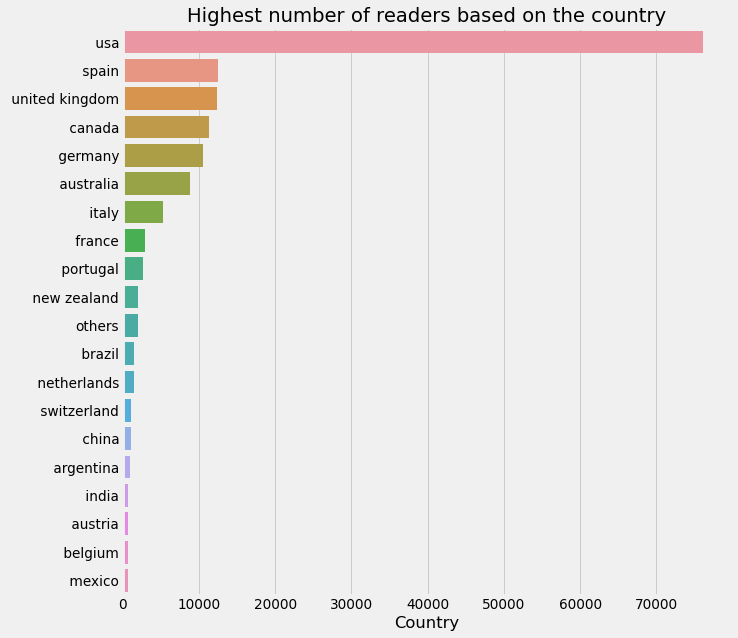

In [85]:
# Plot showing the highest number of readers with respect to country 
plt.figure(dpi=70, figsize=(10,10))
sns.barplot(data=df, y=df.index, x=df['Country'])
plt.title('Highest number of readers based on the country')

## Books Dataset 

In [86]:
# Let's explore book dataset
books_df = books.copy()
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


#### Checking and removing null values 

In [87]:
# Checking the null values
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [88]:
# Dropping the null values
books_df = books_df.dropna()

In [89]:
# Now we don't have any null values in our dataset
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [90]:
book_df = books[books['Book-Title'] != 2002]
book_df.shape

(266729, 5)

In [91]:
# Let's explore the top 10 authors 
df = book_df.copy()
df.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
6,0425176428,What If?: The World's Foremost Military Historians Imagine What Might Have Been,Robert Cowley,2000,Berkley Publishing Group
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks
8,0679425608,Under the Black Flag: The Romance and the Reality of Life Among the Pirates,David Cordingly,1996,Random House
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner


## Top 20 Authors 

In [92]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


Text(0, 0.5, 'Authors name')

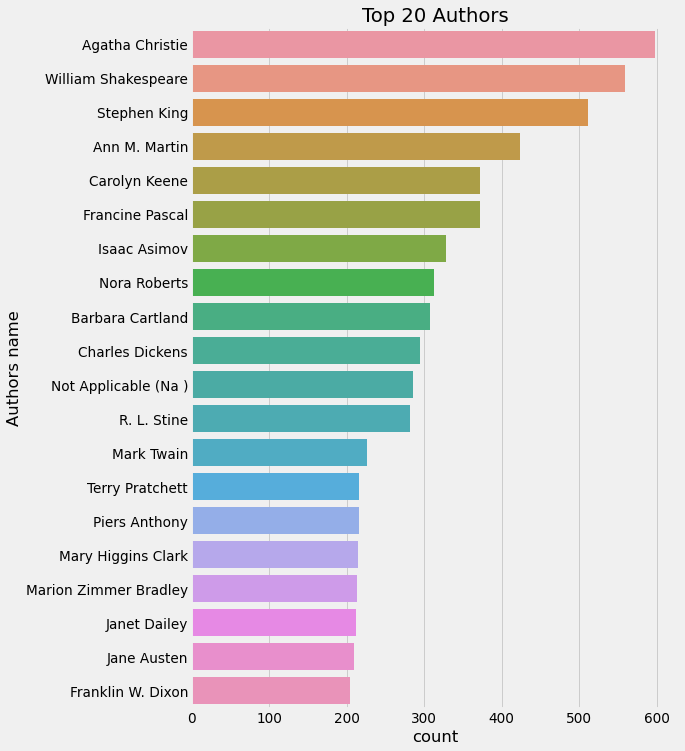

In [93]:
# Barplot showing the top 10 authors 
df = pd.DataFrame(book_df['Book-Author'].value_counts())
df = df.head(20)

plt.figure(figsize=(8,12), dpi=70)
sns.barplot(data=df, y=df.index, x=df['Book-Author'])
plt.title('Top 20 Authors')
plt.xlabel('count')
plt.ylabel('Authors name')

## Top 20 Publishers

Text(0, 0.5, 'Publishers name')

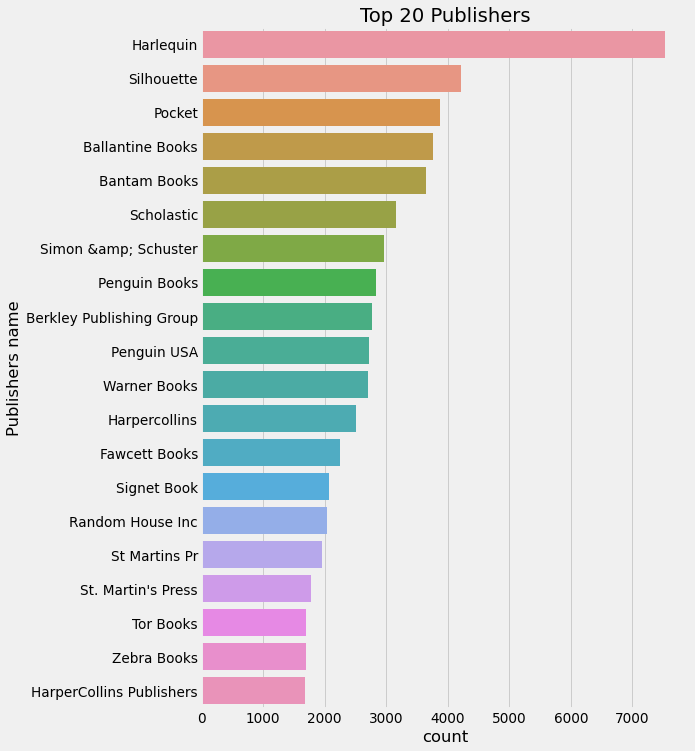

In [94]:
# Top 10 publishers based on the count of the books published
df = pd.DataFrame(book_df['Publisher'].value_counts())
df = df.head(20)
plt.figure(figsize=(8,12), dpi=70)
sns.barplot(data=df, y=df.index, x=df['Publisher'])
plt.title('Top 20 Publishers')
plt.xlabel('count')
plt.ylabel('Publishers name')

## Highest number of yearly publications

In [95]:
dum = pd.DataFrame(b1['Year-Of-Publication'].value_counts())
dum = dum.head(25)
dum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 2002 to 2001
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year-Of-Publication  25 non-null     int64
dtypes: int64(1)
memory usage: 400.0+ bytes


In [96]:
books['Year-Of-Publication'].value_counts()

2002    22258
1999    17431
2001    17359
2000    17234
1998    15766
        ...  
1917    1    
1910    1    
1934    1    
1904    1    
1376    1    
Name: Year-Of-Publication, Length: 109, dtype: int64

Text(0.5, 1.0, 'Highest number of publications based on year')

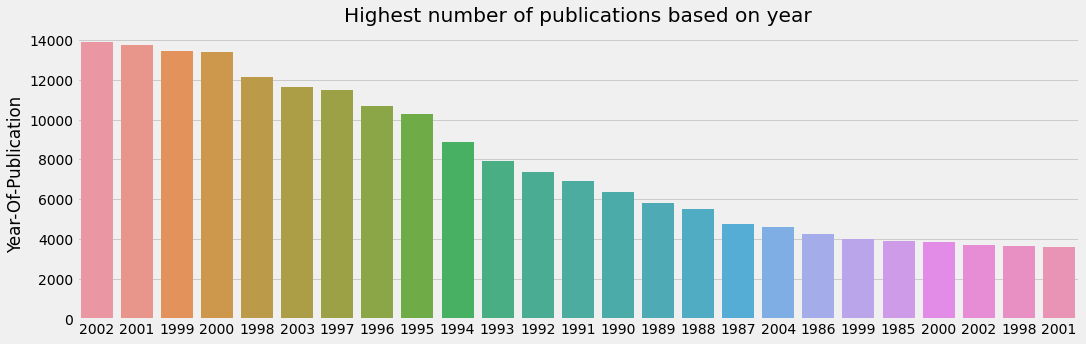

In [97]:
plt.figure(figsize=(16,5))
sns.barplot(x=dum.index, y=dum['Year-Of-Publication'])
plt.title('Highest number of publications based on year')

### Let's rename the columns of the datasets 

We shall be renaming the below columns:
- Books dataset
- Users dataset
- Ratings dataset

In [98]:
# Columns of the books 
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher'],
      dtype='object')

In [99]:
# Removing the unnecessary columns 
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]

In [100]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [101]:
# Renaming the stiff coulmns into normal one
books.rename(columns={'Book-Title':'title',
             'Book-Author':'author',
             'Year-Of-Publication':'year',
             'Publisher':'publisher'}, inplace=True)

In [102]:
books.head(2)

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [103]:
# Checking the columns of the users 
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [104]:
# Renaming the columns 
users = users.rename(columns={'User-ID':'user_id','Location':'location','Age':'age'})

In [105]:
# Verifying the name of the columns 
users.columns

Index(['user_id', 'location', 'age'], dtype='object')

In [106]:
# CHecking the ratings dataset
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [107]:
# Renaming the columns of the updated dataset
ratings = ratings.rename(columns={'User-ID':'user_id', 'Book-Rating':'rating'})

In [108]:
ratings.head(2)

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5


In [109]:
# Rechecking the shape 
users.shape

(278858, 3)

In [110]:
# Ratings shape
ratings.shape

(1149780, 3)

In [111]:
# Books shape 
books.shape

(271360, 5)

# Taking the users having 200 ratings and minimum 50 users
Now we shall see that how many users have provided rating 

In [113]:
ratings['user_id'].value_counts().shape

(105283,)

We have 105283 users who rated the books out of 278858 users
<br>
##  Let's see the users rated more than 200 times
Now we shall remove the users based on two conditions
- The users who rated less than 200 (<200)
- And the books which were rated less than 50 (<50)

In [114]:
# Removing the users rated less than 200 times
df = ratings['user_id'].value_counts() > 200

In [115]:
df[df].shape

(899,)

- So we have 899 users who have rated more than 200 times.
- Hence we shall take them forward for the model 

In [116]:
# Index of the users who have reviwed 200 times
uid = df[df].index

In [117]:
# Extracting the UID from the ratings columns 
ratings = ratings[ratings['user_id'].isin(uid)]

In [118]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [119]:
ratings1 = ratings.set_index('user_id')

In [120]:
# Merging the books based on ISBN
ratings_with_books = ratings.merge(books, on='ISBN')

In [121]:
ratings_with_books.head(2)

,user_id,ISBN,rating,title,author,year,publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc


In [122]:
# Shape of the books rating 
ratings_with_books.shape

(482861, 7)

In [123]:
# Gouping the dataset based on title and Rating 
number_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [124]:
# Let's rename the rating column
number_rating.rename(columns={'rating':'number of rating'},inplace=True)

In [125]:
number_rating.head()

,title,number of rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance for the 1990s,1
4,Clifford Visita El Hospital (Clifford El Gran Perro Colorado),1


In [126]:
# Creating the final rating dataset after merging the books dataset to number of rating dataset
final_rating = ratings_with_books.merge(number_rating, on='title')

In [127]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,number of rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,82


In [128]:
# Shape of final rating 
final_rating.shape

(482861, 8)

In [129]:
# Let's remove the books that have rated less than 50 times 
final_rating = final_rating[final_rating['number of rating'] >=50]

In [130]:
final_rating.shape

(61480, 8)

In [131]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,number of rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,82


- So we hvae 61853 users who have rated more 200 times
- And so we shall the those books only which have been rated more than 50 times
<br>

### Dropping the duplicates

In [132]:
# Dropping the duplicates data from dataframe
final_rating = final_rating.drop_duplicates(['user_id','title'])

In [133]:
# Now we have zero duplicates values left 
final_rating.duplicated().sum()

0

In [134]:
# Shape of the final rating dataset 
final_rating.shape

(59507, 8)

So we had some duplicates sitting in the dataframe now have been removed 
<br>

### Checking the nan values

In [135]:
# CHecking the NaN values last time 
final_rating.isnull().sum()

user_id             0
ISBN                0
rating              0
title               0
author              0
year                0
publisher           0
number of rating    0
dtype: int64

In [136]:
df = final_rating.merge(users, on='user_id')

In [137]:
#Filter out the age columns
df = df[df['age']<100]

In [138]:
# Checking if there is any null values in the age 
df['age'].isnull().sum()

0

In [139]:
df.head()

,user_id,ISBN,rating,title,author,year,publisher,number of rating,location,age
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,82,"gilbert, arizona, usa",48.0
1,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,133,"gilbert, arizona, usa",48.0
2,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,108,"gilbert, arizona, usa",48.0
3,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Paperback)),Janet Evanovich,1995,HarperTorch,108,"gilbert, arizona, usa",48.0
4,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,77,"gilbert, arizona, usa",48.0


# Building a Recommendation Engine

#What actually is Recommendation System

*  A recommendation engine is a class of machine learning which offers relevant suggestions to the customer.  Before the recommendation system, the major tendency to buy was to take a suggestion from friends. But Now Google knows what news you will read, Youtube knows what type of videos you will watch based on your search history, watch history, or purchase history. 

*   A recommendation system helps an organization to create loyal customers and build trust by them desired products and services for which they came on your site. The recommendation system today are so powerful that they can handle the new customer too who has visited the site for the first time. They recommend the products which are currently trending or highly rated and they can also recommend the products which bring maximum profit to the company.





![Image of Yaktocat](https://editor.analyticsvidhya.com/uploads/94559Untitled%20design.png)

In [140]:
# Let's design a recommendar system based on final_rating dataset
# Let's create a pivot table
book_pivot = final_rating.pivot_table(columns ={'user_id'}, index='title', values='rating')
book_pivot.shape

(737, 888)

In [141]:
# Checking the Pivot table 
book_pivot.head()

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
# Filling nan values with 0
book_pivot = book_pivot.fillna(0)
book_pivot.head()

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Importing the necessory libraries  

In [143]:
# Let's cluster this pivot table using NearestNeighbors
# Let's decompose this matrix into sparse matrix to get rid from 0 

from scipy.sparse import csr_matrix

In [144]:
# Creating the sparse matrix 
book_sparse = csr_matrix(book_pivot)

In [145]:
type(book_sparse)

scipy.sparse.csr.csr_matrix

## Importing Nearest Neighbors algorithm 

In [146]:
# Algorithm
from sklearn.neighbors import NearestNeighbors

In [147]:
# Creating instance of the model with type brute as we want to apply this on whole matrix dataset 
model = NearestNeighbors(algorithm='brute')

In [148]:
# Training the model
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [149]:
# Distances store the most nearest books in numpy array and suggestions contains the ISBN number of them
# Checking the distance and suggestions at ISBN of 237
distances, suggestions = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1), n_neighbors=6)

In [150]:
distances

array([[ 0.        , 57.94825278, 58.88972746, 59.05082557, 59.09314681,
        59.11852502]])

In [151]:
suggestions

array([[237, 180, 480, 683, 367, 686]])

In [152]:
# Printing the recommended books 
for i in range(len(suggestions)):
    print(book_pivot.index[suggestions[i]])

Index(['Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'Table For Two', 'Tough Cookie', 'No Safe Place',
       'Truly, Madly Manhattan'],
      dtype='object', name='title')


Hurrey! Testing is successful now let's create a function to perform recommendation 

In [153]:
# Function that takes input as book name and recommends book to users 
def recommend_books(name):
    book_id = np.where(book_pivot.index== name)[0][0]
    distances, suggestions = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6)
    
    for i in range(len(suggestions)):
        print(book_pivot.index[suggestions[i]])
        print

In [154]:
# Let's test this for the one of the political books Animal Farm and see the recommendation
recommend_books('Animal Farm')

Index(['Animal Farm', 'Exclusive', 'Second Nature', 'Pleading Guilty',
       'No Safe Place', 'Foucault's Pendulum'],
      dtype='object', name='title')


In [155]:
recommend_books('Wild Animus')

Index(['Wild Animus', 'Exclusive', 'No Safe Place', 'The First Counsel',
       'Long After Midnight', 'The Cradle Will Fall'],
      dtype='object', name='title')


In [156]:
recommend_books('''Harry Potter and the Sorcerer's Stone (Book 1)''')

Index(['Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'Table For Two', 'Tough Cookie', 'No Safe Place',
       'Truly, Madly Manhattan'],
      dtype='object', name='title')


# Popularity based filtering 


*  It is a type of recommendation system which works on the principle of popularity and or anything which is in trend. These systems check about the product or movie which are in trend or are most popular among the users and directly recommend those.

 


*   For example, if a product is often purchased by most people then the system will get to know that that product is most popular so for every new user who just signed it, the system will recommend that product to that user also and chances becomes high that the new user will also purchase that.



In [157]:
df.shape

(46063, 10)

In [158]:
df.head()

,user_id,ISBN,rating,title,author,year,publisher,number of rating,location,age
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,82,"gilbert, arizona, usa",48.0
1,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,133,"gilbert, arizona, usa",48.0
2,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,108,"gilbert, arizona, usa",48.0
3,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Paperback)),Janet Evanovich,1995,HarperTorch,108,"gilbert, arizona, usa",48.0
4,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,77,"gilbert, arizona, usa",48.0


In [159]:
final_rating.shape

(59507, 8)

In [160]:
final_rating1 = final_rating.copy()

In [161]:
df['popularity'] = df['rating'] * df['number of rating']

In [162]:
df.head()

,user_id,ISBN,rating,title,author,year,publisher,number of rating,location,age,popularity
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,82,"gilbert, arizona, usa",48.0,820
1,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,133,"gilbert, arizona, usa",48.0,0
2,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,108,"gilbert, arizona, usa",48.0,0
3,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Paperback)),Janet Evanovich,1995,HarperTorch,108,"gilbert, arizona, usa",48.0,972
4,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,77,"gilbert, arizona, usa",48.0,0


In [163]:
df['Avg_Rating']=df.groupby('ISBN')['rating'].transform('mean')
# Create column Rating sum
df.head(2)

,user_id,ISBN,rating,title,author,year,publisher,number of rating,location,age,popularity,Avg_Rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,82,"gilbert, arizona, usa",48.0,820,2.00000
1,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,133,"gilbert, arizona, usa",48.0,0,1.15534


In [164]:
df1 = df.drop('user_id', axis=1)
df1 = df1.drop(['location', 'age','Avg_Rating','publisher','year','ISBN'], axis=1)
df1 = df1.drop_duplicates()


In [165]:
df1 = df1.sort_values(by= 'popularity', ascending=False)
df1 = df1.head(40)
df1

,rating,title,author,number of rating,popularity
33103,9,Wild Animus,Rich Shapero,363,3267
4604,10,Bridget Jones's Diary,Helen Fielding,277,2770
1148,10,The Lovely Bones: A Novel,Alice Sebold,270,2700
3328,7,Wild Animus,Rich Shapero,363,2541
1030,9,Bridget Jones's Diary,Helen Fielding,277,2493
1653,9,The Lovely Bones: A Novel,Alice Sebold,270,2430
1235,10,The Notebook,Nicholas Sparks,241,2410
10353,10,The Pelican Brief,John Grisham,236,2360
49224,10,The Pelican Brief,JOHN GRISHAM,236,2360
11301,10,The Nanny Diaries: A Novel,Emma McLaughlin,230,2300


In [166]:
df1.head()

,rating,title,author,number of rating,popularity
33103,9,Wild Animus,Rich Shapero,363,3267
4604,10,Bridget Jones's Diary,Helen Fielding,277,2770
1148,10,The Lovely Bones: A Novel,Alice Sebold,270,2700
3328,7,Wild Animus,Rich Shapero,363,2541
1030,9,Bridget Jones's Diary,Helen Fielding,277,2493


## Memory-Based Collaborative Filtering

It is considered to be one of the very smart recommender systems that work on the similarity between different users and also items that are widely used as an e-commerce website and also online movie websites. It checks about the taste of similar users and does recommendations. 

 

The similarity is not restricted to the taste of the user moreover there can be consideration of similarity between different items also. The system will give more efficient recommendations if we have a large volume of information about users and items.

![Image of Yaktocat](https://lh4.googleusercontent.com/tAgCYMrhIquk_x956HN4aF04SkymGfbdwTIr1M4wBD81cA6N5XZImB8EBsbmMs3k0pp5n36z1z1n77sMTRV9jxZ-j7fxp6BookRT8cTxdmsU-8gYdKrbAJBlWGGxtNLFGH2oYJrQ)
#### Memory-Based Collaborative Filtering are of two kinds:

1. User-item filtering

![Image of Yaktocat](https://lh4.googleusercontent.com/QXB17mtfhautTzB_C0LR60QQSNDW_HHAuIG57j80gZWOcXFZEI5u0KslDROFam2U-96R0CKedr0Z8UjRLFWi0_ezBda7y-9PTouNTLqEBYBOh_BhO6sVDIgQXPaIoXSI1A7Bws6g)
2. Item-item filtering

![Image of Yaktocat](https://lh5.googleusercontent.com/G9ro32gdhvKWXKWGv-FYlaZodTITFXvjuTVVW02d2v8zznOKU8V6pGWd-UNtwceuMdtuszIXyMjqphgLea0IEnm7t60Mr_LNTBD-tN-3-TEqMuorhjZKgCXk-9eD1maQaC6kEOcd)

A user-item filtering will take a particular user and find users that are similar to that user based on similarity of ratings. Then it will recommend items that are similar to the ones the users liked.

Unlike user-item filtering, item-item filtering will take an item, find users who liked that item, and find other items that those users or similar users also liked. It takes items and recommends other items.

- Item-Item Collaborative Filtering: “Users who liked this item also liked …”
- User-Item Collaborative Filtering: “Users who are similar to you also liked …”

## Train | Test | Split

In [167]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(final_rating1, test_size=0.20)

In [168]:
train_data.head()

,user_id,ISBN,rating,title,author,year,publisher,number of rating
81498,230522,0553275976,7,The Bonfire of the Vanities,Tom Wolfe,1988,Bantam Books,92
69498,84024,0312291639,0,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,230
32683,35050,0425147622,0,The Body Farm,Patricia Daniels Cornwell,1995,Berkley Publishing Group,95
100394,236283,0316969443,0,Suzanne's Diary for Nicholas,James Patterson,2001,"Little, Brown",143
15924,265313,0446607657,0,When the Wind Blows,James Patterson,1999,Warner Vision,161


In [169]:
test_data.head()

,user_id,ISBN,rating,title,author,year,publisher,number of rating
4616,224764,0385504209,0,The Da Vinci Code,Dan Brown,2003,Doubleday,223
41070,40889,0515126772,10,Jewels of the Sun (Irish Trilogy),Nora Roberts,2004,Jove Books,81
84866,55548,0679746048,0,"Girl, Interrupted",SUSANNA KAYSEN,1994,Vintage,81
183827,155014,0671011367,0,Deja Dead,Kathy Reichs,1998,Pocket,69
6064,130571,0425175405,0,Black Notice,Patricia Daniels Cornwell,2000,Berkley Publishing Group,123


In [170]:
print(f'Training set lengths: {len(train_data)}')
print(f'Testing set lengths: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

Training set lengths: 47605
Testing set lengths: 11902
Test set is 20% of the full dataset.


In [171]:
# Get int mapping for user_id in train dataset

u_unique_train = train_data.user_id.unique()  
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}

# Get int mapping for isbn in train dataset

i_unique_train = train_data.ISBN.unique()  
train_data_book2idx = {o:i for i, o in enumerate(i_unique_train)}

# Get int mapping for user_id in test dataset

u_unique_test = test_data.user_id.unique()  
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}

# Get int mapping for isbn in train dataset

i_unique_test = test_data.ISBN.unique() 
test_data_book2idx = {o:i for i, o in enumerate(i_unique_test)}

In [172]:
# TRAINING SET
train_data['u_unique'] = train_data['user_id'].map(train_data_user2idx)
train_data['i_unique'] = train_data['ISBN'].map(train_data_book2idx)

# TESTING SET
test_data['u_unique'] = test_data['user_id'].map(test_data_user2idx)
test_data['i_unique'] = test_data['ISBN'].map(test_data_book2idx)

# Convert back to 3-column df
train_data = train_data[['u_unique', 'i_unique', 'rating']]
test_data = test_data[['u_unique', 'i_unique', 'rating']]

In [173]:
train_data.sample(5)

,u_unique,i_unique,rating
26191,531,1108,0
168291,0,359,0
89055,42,450,0
84901,129,461,9
72433,414,83,10


## User-Item Matrix for Train Data
At first I'll create an empty matrix of users * books and the will add the appropriate values to the matrix by extracting them from the dataset. 

In [174]:
n_users = train_data['u_unique'].nunique()
n_books = train_data['i_unique'].nunique()

train_matrix = np.zeros((n_users, n_books))

for entry in train_data.itertuples():                  # entry[1] is the user-id, entry[2] is the book-isbn
    train_matrix[entry[1]-1, entry[2]-1] = entry[3]    # -1 is to counter 0-based indexing

In [175]:
train_matrix.shape

(885, 2018)

## User-Item matrix on test data

In [176]:
n_users = test_data['u_unique'].nunique()
n_books = test_data['i_unique'].nunique()

test_matrix = np.zeros((n_users, n_books))

for entry in test_data.itertuples():
    test_matrix[entry[1]-1, entry[2]-1] = entry[3] 

In [177]:
test_matrix.shape

(863, 1488)

## Cosine Similarity Based Recommendation System
As I am doing this calculations on my PC, so it is not a good idea to perform this huge calculation. So I'll perform on a subset initially. It will take a bit of time to calculate.<br>

A distance metric commonly used in recommender systems is cosine similarity, where the ratings are seen as vectors in n-dimensional space and the similarity is calculated based on the angle between these vectors.<br>

To make item-item similarity we need to take the transpose of the matrix.

In [178]:
train_matrix_small = train_matrix[:5000, :5000]
test_matrix_small = test_matrix[:5000, :5000]

from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_matrix_small, metric='cosine')
item_similarity = pairwise_distances(train_matrix_small.T, metric='cosine') 

In [179]:
def predict_books(ratings, similarity, type='user'): # default type is 'user'
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        
        # Use np.newaxis so that mean_user_rating has the same format as ratings
        
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [180]:
item_prediction = predict_books(train_matrix_small, item_similarity, type='item')
user_prediction = predict_books(train_matrix_small, user_similarity, type='user')

In [181]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, test_matrix):
    prediction = prediction[test_matrix.nonzero()].flatten()
    test_matrix = test_matrix[test_matrix.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, test_matrix))

print(f'Item-based CF RMSE: {rmse(item_prediction, test_matrix_small)}')
print(f'User-based CF RMSE: {rmse(user_prediction, test_matrix_small)}')

Item-based CF RMSE: 8.071119769361411
User-based CF RMSE: 8.039019324678922


- We see our recommendation system gives 8.1 RMSE score. I want to check if we can make any improvement in this score by using another method. For this I will use Single valu decomposition method from the Surprise library.

## SVD Based recommendation System

The Singular Value Decomposition (SVD), a method from linear algebra that has been generally used as a dimensionality reduction technique in machine learning. SVD is a matrix factorisation technique, which reduces the number of features of a dataset by reducing the space dimension from N-dimension to K-dimension (where K<N). In the context of the recommender system, the SVD is used as a collaborative filtering technique. It uses a matrix structure where each row represents a user, and each column represents an item. The elements of this matrix are the ratings that are given to items by users.

In [182]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 11.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633725 sha256=694adce5f42806ba1a6fa4edac067a3b3804b18fd9ebeefc0135b8d826b81fb1
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [183]:
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV
from surprise import model_selection, accuracy

In [184]:
df=final_rating.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(final_rating1[['user_id', 'ISBN', 'rating']], reader)

In [185]:
model = SVD()

# Train on books dataset

%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.3789  3.4089  3.3910  3.3755  3.4238  3.3956  0.0183  
Fit time          3.38    5.54    7.51    8.09    7.58    6.42    1.75    
Test time         0.12    0.18    0.30    0.24    0.29    0.23    0.07    
CPU times: user 25.4 s, sys: 75.2 ms, total: 25.5 s
Wall time: 34.1 s


{'fit_time': (3.377375364303589,
  5.539489030838013,
  7.509178876876831,
  8.093993186950684,
  7.584242820739746),
 'test_rmse': array([3.37885901, 3.40886073, 3.39100624, 3.37546381, 3.42378242]),
 'test_time': (0.12466311454772949,
  0.1807711124420166,
  0.30254554748535156,
  0.24157071113586426,
  0.28812694549560547)}

## Train Test split

In [186]:
trainset, testset = model_selection.train_test_split(data, test_size=0.2)

model = SVD()

model.fit(trainset)
predictions = model.test(testset)

accuracy.rmse(predictions)

RMSE: 3.3935


3.3934981155215302

- We see the RMSE score has improved a lot. It is now on average 1.52 which is pretty good.

### Testing Results !
Let's take an arbitrary user-id and item-id to test our model.

In [187]:
uid = 276744  
iid = '038550120X' 
pred = model.predict(uid, iid, verbose=True)

user: 276744     item: 038550120X r_ui = None   est = 2.44   {'was_impossible': False}


In [188]:
d_user = final_rating[final_rating['ISBN'] == '038550120X']
d_user = d_user[d_user['rating']!=0]

In [189]:
print(f'The actual rating given by the user is ',d_user['rating'].mean())

The actual rating given by the user is  8.1


In [190]:
param_grid = {'n_factors': [80,100],
              'n_epochs': [5, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

3.2595560375207566
{'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.4}


## Analysis of Collaborative Filtering model results
In this part, let's examine in detail the results obtained by the SVD model that provided the best RMSE score.

In [191]:
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)

In [192]:
df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(5)

,user_id,isbn,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
8158,114414,0316781010,0.0,1.000000,False,1.0,1.000000
9253,78834,0345424719,0.0,1.829623,False,2.0,1.829623
4514,115003,0316569321,8.0,1.247197,False,1.0,6.752803
1200,268330,0449223612,0.0,1.000000,False,1.0,1.000000
3430,198711,0440213290,0.0,1.000000,False,1.0,1.000000


- Distribution of actual and predicted ratings in the test set According to the distribution of actual ratings of books in the test set, the biggest part of users give positive scores - between 7 and 10. The mode equals 8 but count of ratings 7, 9, 10 is also noticeable. The distribution of predicted ratings in the test set is visibly different. One more time, 8 is a mode but scores 7, 9 and 10 are clearly less frequent. 

It shows that the recommender system is not perfect and it cannot reflect the real distribution of book ratings.

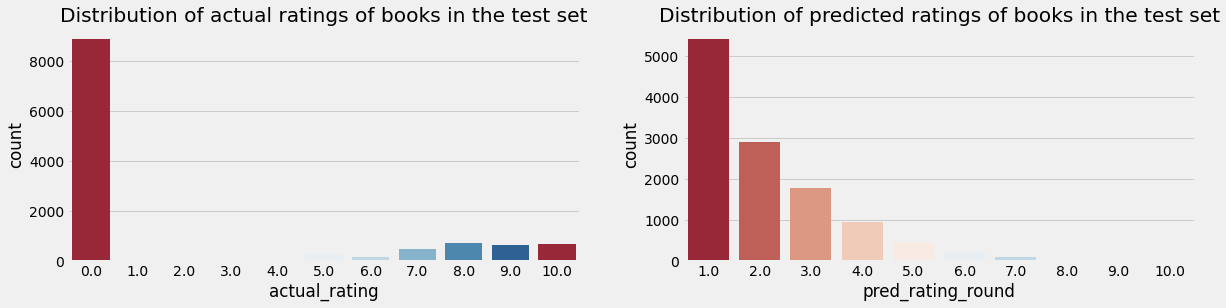

In [193]:
palette = sns.color_palette("RdBu", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of books in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of books in the test set')

plt.show()

### Absolute error of predicted ratings
The distribution of absolute errors is right-skewed, showing that the majority of errors is small: between 0 and 1. There is a long tail that indicates that there are several observations for which the absolute error was close to 10.

How good/bad the model is with predicting certain scores? As expected from the above charts, the model deals very well with predicting score = 8 (the most frequent value). The further the rating from score = 8, the higher the absolute error.

The biggest errors happen to observations with scores 1 or 2 which indicates that probably the model is predicting high ratings for those observations.

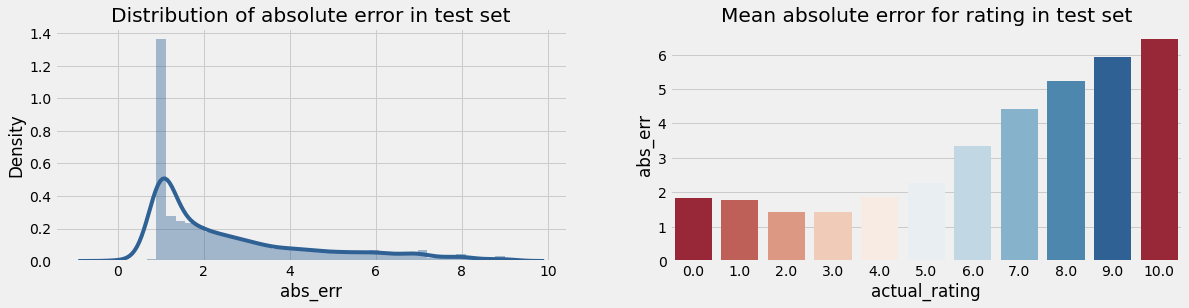

In [194]:
df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')

sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')

plt.show()